## <font size=5> <strong>Heart Disease Prediction Model



## I. Importing essential libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# import os
# print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

## II. Importing and understanding our dataset

In [4]:
dataset = pd.read_csv("/content/drive/MyDrive/heart.csv")
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]
for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


1. age: The person's age in years

2. sex: The person's sex (1 = male, 0 = female)

3. cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

4. trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5. chol: The person's cholesterol measurement in mg/dl

6. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7. restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8. thalach: The person's maximum heart rate achieved

9. exang: Exercise induced angina (1 = yes; 0 = no)

10. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12. ca: The number of major vessels (0-3)

13. thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14. target: Heart disease (0 = no, 1 = yes)

In [6]:
dataset.shape

(1025, 14)

#### Printing out a few columns

In [7]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
684,60,1,2,140,185,0,0,155,0,3.0,1,0,2,0
770,41,1,1,135,203,0,1,132,0,0.0,1,0,1,1
882,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
469,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
838,51,1,3,125,213,0,0,125,1,1.4,2,1,2,1


#### Description

In [9]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


#### Let's understand our columns better:

#### Analysing the 'target' variable

In [11]:
dataset["target"].describe()

,target
count,1025.000000
mean,0.513171
std,0.500070
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


Clearly, this is a classification problem, with the target variable having values '0' and '1'

In [12]:
dataset["target"].unique()

array([0, 1])

### Checking correlation between columns

In [13]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

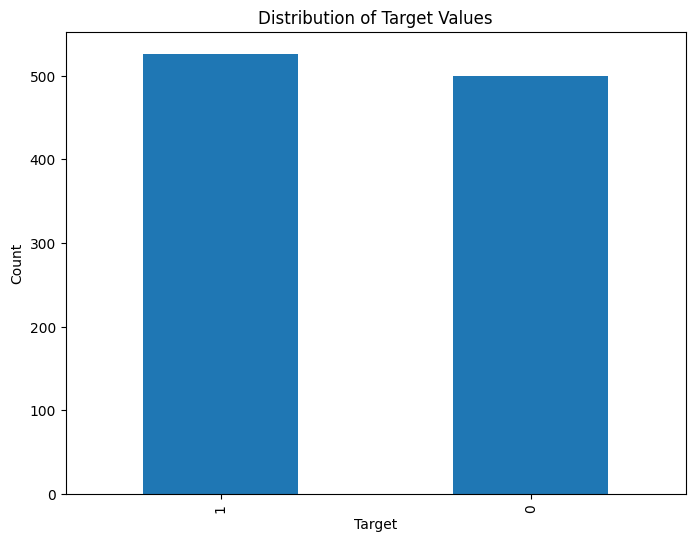

target
1    526
0    499
Name: count, dtype: int64


In [14]:
y = dataset["target"]

# Plot the count of target values
plt.figure(figsize=(8, 6))
dataset["target"].value_counts().plot(kind='bar')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Values')
plt.show()

# Get value counts for target variable
target_temp = dataset["target"].value_counts()

# Print the counts
print(target_temp)

In [15]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/1025,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/1025,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 48.68
Percentage of patience with heart problems: 51.32


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

##### We notice, that as expected, the 'sex' feature has 2 unique features

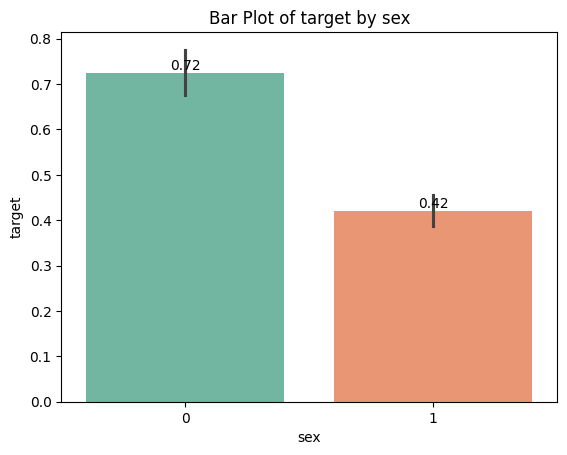

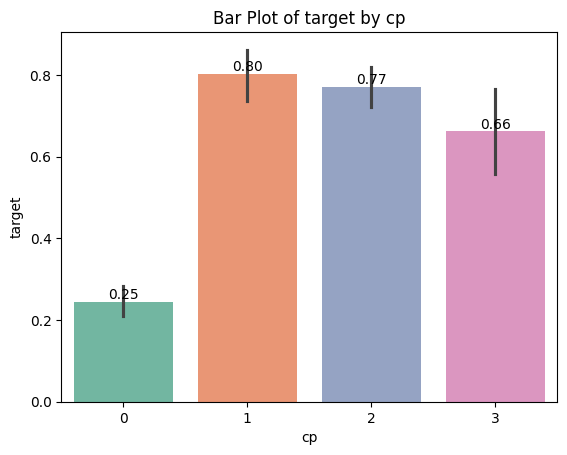

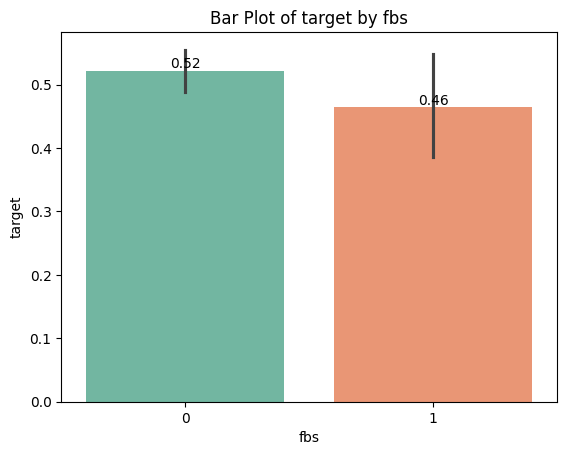

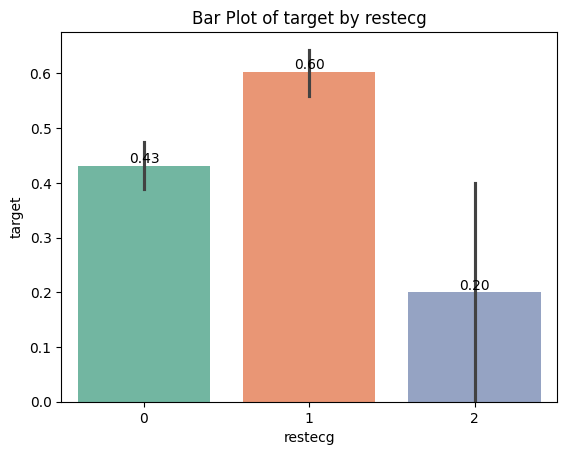

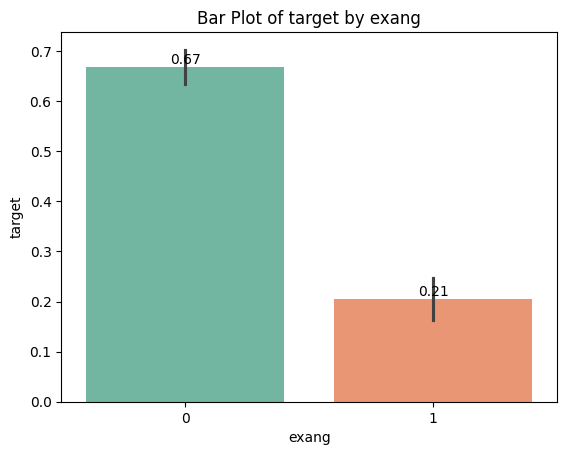

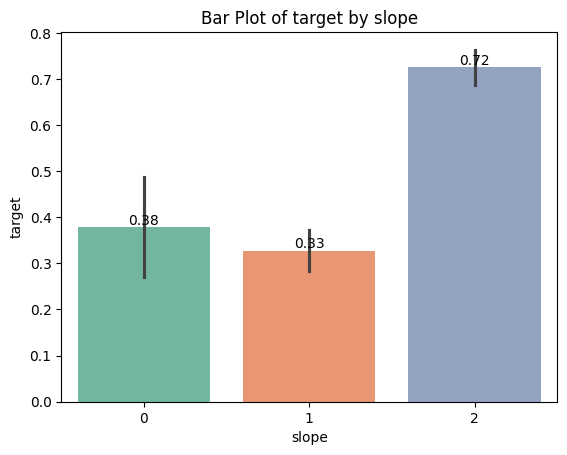

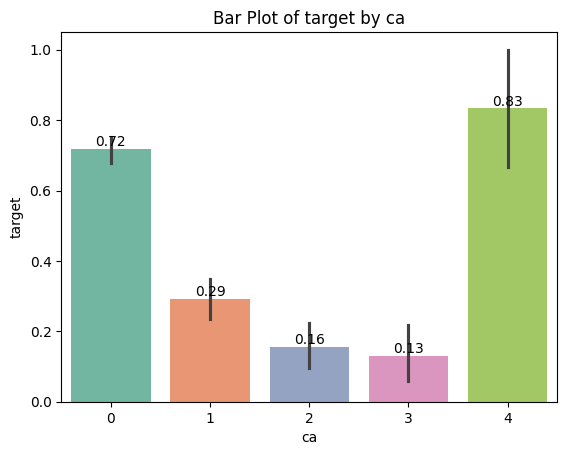

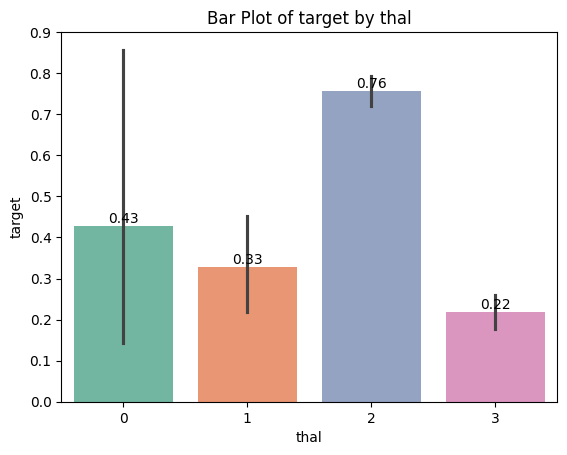

In [16]:
def plot_bar(feature, target, palette="Set2"):
    # Create the bar plot with Seaborn
    ax = sns.barplot(x=dataset[feature], y=dataset[target], palette=palette)

    # Set plot labels and title
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'Bar Plot of {target} by {feature}')

    # Add labels to each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points')

    plt.show()

# List of features to plot
features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca','thal']  # Add more features as needed

# Plot for each feature
for feature in features:
    plot_bar(feature, "target")

##  Train Test split

In [51]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,y_train,y_test = train_test_split(predictors,target,test_size=0.20,random_state=42)

In [52]:
X_train.shape

(820, 13)

In [53]:
X_test.shape

(205, 13)

In [54]:
y_train.shape

(820,)

In [55]:
y_test.shape

(205,)

##  Different Machine Learning Models

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred_proba)

    return {
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc
    }


The parameter C is the inverse of the regularization strength.

Regularization is a technique used to prevent overfitting by penalizing large coefficients in the model.The goal is to make the model more generalizable to unseen data.

C controls the trade-off between the regularization strength and the accuracy of the model on the training set.
A small value of C means stronger regularization (more penalty), encouraging smaller or zero coefficients. This helps avoid overfitting.
A large value of C means weaker regularization (less penalty), allowing the model to fit more closely to the training data, which could result in overfitting.

## Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV



log_reg_param_grid = {
    'C': [0.01, 0.1, 1, 10]
}


log_reg_grid_search = GridSearchCV(LogisticRegression(), log_reg_param_grid, cv=5, scoring='accuracy')
log_reg_grid_search.fit(X_train, y_train)
best_log_reg = log_reg_grid_search.best_estimator_


log_reg_results = evaluate_model(best_log_reg, X_train, X_test, y_train, y_test)
print("Logistic Regression Results:")
print(log_reg_results)


Logistic Regression Results:
{'Train Accuracy': 0.8719512195121951, 'Test Accuracy': 0.7951219512195122, 'Precision': 0.7563025210084033, 'Recall': 0.8737864077669902, 'F1 Score': 0.8108108108108107, 'ROC-AUC': 0.8787359604035789}


## K-Nearest Neighbors (KNN)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9]
}

# Create GridSearchCV object
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)
best_knn = knn_grid_search.best_estimator_

# Evaluate the model
knn_results = evaluate_model(best_knn, X_train, X_test, y_train, y_test)
print("K-Nearest Neighbors Results:")
print(knn_results)


K-Nearest Neighbors Results:
{'Train Accuracy': 0.9951219512195122, 'Test Accuracy': 0.9365853658536586, 'Precision': 0.9245283018867925, 'Recall': 0.9514563106796117, 'F1 Score': 0.9377990430622011, 'ROC-AUC': 0.9883399961926518}


 ## Decision Tree

In [67]:
dt_param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object
dt_grid_search = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)
best_dt = dt_grid_search.best_estimator_
dt_results = evaluate_model(best_dt, X_train, X_test, y_train, y_test)
print("Decision Tree Results:")
print(dt_results)

Decision Tree Results:
{'Train Accuracy': 1.0, 'Test Accuracy': 0.9853658536585366, 'Precision': 1.0, 'Recall': 0.970873786407767, 'F1 Score': 0.9852216748768473, 'ROC-AUC': 0.9854368932038835}


## Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Create GridSearchCV object
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)
best_rf = rf_grid_search.best_estimator_

# Evaluate the model
rf_results = evaluate_model(best_rf, X_train, X_test, y_train, y_test)
print("Random Forest Results:")
print(rf_results)


Random Forest Results:
{'Train Accuracy': 1.0, 'Test Accuracy': 0.9853658536585366, 'Precision': 1.0, 'Recall': 0.970873786407767, 'F1 Score': 0.9852216748768473, 'ROC-AUC': 1.0}


In [70]:
model_results = {
    'Logistic Regression': log_reg_results,
    'K-Nearest Neighbors (KNN)' : knn_results,
    'Decision Tree': dt_results,
    'Random Forest': rf_results,
}


results_df = pd.DataFrame(model_results).T
print(results_df)

                           Train Accuracy  Test Accuracy  Precision    Recall  \
Logistic Regression              0.871951       0.795122   0.756303  0.873786   
K-Nearest Neighbors (KNN)        0.995122       0.936585   0.924528  0.951456   
Decision Tree                    1.000000       0.985366   1.000000  0.970874   
Random Forest                    1.000000       0.985366   1.000000  0.970874   

                           F1 Score   ROC-AUC  
Logistic Regression        0.810811  0.878736  
K-Nearest Neighbors (KNN)  0.937799  0.988340  
Decision Tree              0.985222  0.985437  
Random Forest              0.985222  1.000000  


In [74]:
import joblib

# Save the best Random Forest model
joblib.dump(best_rf, 'best_random_forest_heart_disease_model.pkl')

print('Random Forest model saved successfully!')

Random Forest model saved successfully!


In [75]:
loaded_model = joblib.load('best_random_forest_heart_disease_model.pkl')

In [78]:
import gradio as gr
import joblib
import pandas as pd

# Load the best model (update the filename if necessary)
model_filename = 'best_random_forest_heart_disease_model.pkl'
model = joblib.load(model_filename)

# Define the feature names based on your dataset
feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Define the prediction function
def predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    # Create a DataFrame from user input
    input_data = pd.DataFrame([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]],
                              columns=feature_names)

    # Make prediction using the model
    prediction = model.predict(input_data)

    # Return result
    return "Heart Disease" if prediction[0] == 1 else "No Heart Disease"

# Create a Gradio interface
iface = gr.Interface(
    fn=predict_heart_disease,
    inputs=[
        gr.Number(label="Age"),
        gr.Number(label="Sex (1 = male, 0 = female)"),
        gr.Number(label="CP (chest pain type)"),
        gr.Number(label="Trestbps (resting blood pressure)"),
        gr.Number(label="Chol (serum cholesterol in mg/dl)"),
        gr.Number(label="Fbs (fasting blood sugar > 120 mg/dl)"),
        gr.Number(label="Restecg (resting electrocardiographic results)"),
        gr.Number(label="Thalach (maximum heart rate achieved)"),
        gr.Number(label="Exang (exercise induced angina)"),
        gr.Number(label="Oldpeak (depression induced by exercise relative to rest)"),
        gr.Number(label="Slope (slope of the peak exercise ST segment)"),
        gr.Number(label="CA (number of major vessels colored by fluoroscopy)"),
        gr.Number(label="Thal (thalassemia)")
    ],
    outputs="text",
    title="Heart Disease Prediction",
    description="Enter the features to predict the presence of heart disease."
)

# Launch the Gradio interface
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://74d251d0259e4db13e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
